In [80]:
# Cell 1: imports
# ----------------
# - make_blobs : handy function to generate synthetic clusterable data
# - KMeans     : the K-Means clustering algorithm
# - StandardScaler : scale features to mean=0, std=1 (helps many algorithms)
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [81]:
# Cell 2: generate synthetic data with 5 centers
# X : array shape (n_samples, n_features)
# y_true : the "true" cluster index returned by make_blobs (useful for testing)
X, y_true = make_blobs(n_samples=5000, centers=5, random_state=67)

# Note: you previously wrote `X, _ = make_blobs(...)`.
# The single underscore "_" is just a Python convention meaning "I don't need this value".
# Here I'm keeping y_true so you can compare KMeans output to the real labels if you want.

In [82]:
# Cell 3: scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

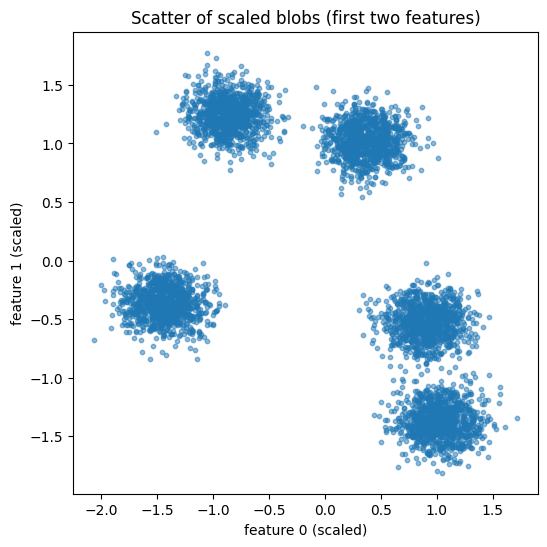

In [83]:
# Cell 4: visualize the scaled data (first two features)
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=10, alpha=0.5)
plt.xlabel("feature 0 (scaled)")
plt.ylabel("feature 1 (scaled)")
plt.title("Scatter of scaled blobs (first two features)")
plt.show()

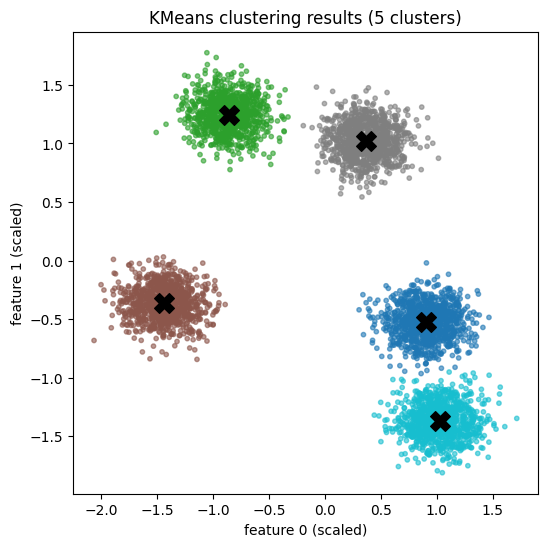

' # c= color mapping\nIf you use c=kmeans.labels_ → \n\nEach point is colored by the cluster index assigned by KMeans.\n\nThis shows the model’s discovered clusters.\n\n✅ Useful for evaluating how well the algorithm grouped the data.\n'

In [84]:
# Cell 5: KMeans clustering + visualization
# ------------------------------------------
# 1) Create a KMeans object with 5 clusters
#    - n_clusters=5 : we expect 5 groups in the data (since we generated 5 blobs)
#    - random_state : set a fixed seed for reproducibility (optional but recommended)
kmeans = KMeans(n_clusters=5, random_state=67, n_init=10)

# 2) Fit the model to the scaled data
#    - kmeans.fit(X_scaled) runs the KMeans algorithm:
#         a) chooses initial centers
#         b) assigns each point to the nearest center
#         c) recomputes centers as mean of points
#         d) repeats until convergence
kmeans.fit(X_scaled)

# 3) After fitting, scikit-learn creates new attributes with trailing underscore "_"
#    - kmeans.labels_ : array of shape (n_samples,), the cluster index (0–4 here) for each sample
#    - kmeans.cluster_centers_ : array of shape (n_clusters, n_features), coordinates of cluster centers
#    - kmeans.inertia_ : sum of squared distances of samples to their nearest cluster center
#
# Note: "labels_" (plural + underscore) is the correct attribute.
#       "label_" (singular) does NOT exist and will raise an AttributeError.

# 4) Plot the data colored by cluster assignment
plt.figure(figsize=(6,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=kmeans.labels_, cmap='tab10', s=10, alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            c='black', s=200, marker='X')  # plot centers as black Xs
plt.title("KMeans clustering results (5 clusters)")
plt.xlabel("feature 0 (scaled)")
plt.ylabel("feature 1 (scaled)")
plt.show()


""" # c= color mapping
If you use c=kmeans.labels_ → 

Each point is colored by the cluster index assigned by KMeans.

This shows the model’s discovered clusters.

✅ Useful for evaluating how well the algorithm grouped the data.
"""

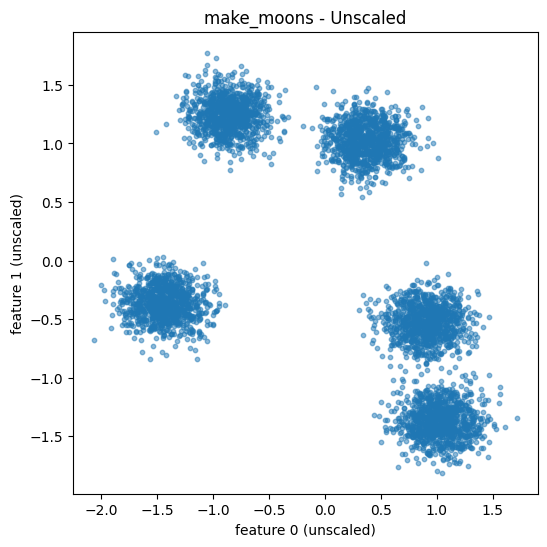

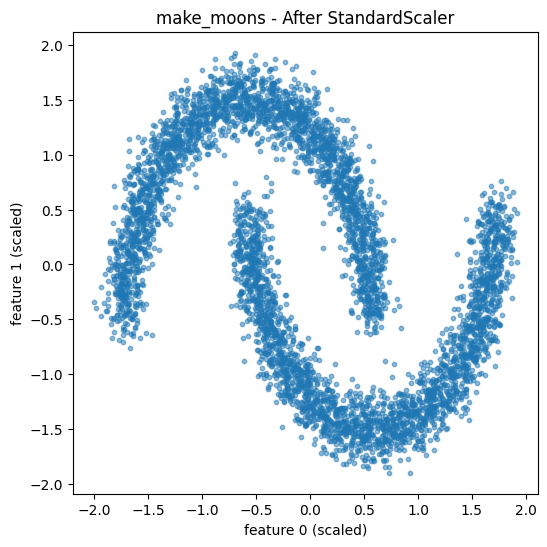

In [85]:
# Cell 6: make_moons with and without scaling
# -------------------------------------------

from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# --- Unscaled ---
X, _ = make_moons(n_samples=5000, noise=0.08, random_state=42)

plt.figure(figsize=(6,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], s=10, alpha=0.5)
plt.title("make_moons - Unscaled")
plt.xlabel("feature 0 (unscaled)")
plt.ylabel("feature 1 (unscaled)")
plt.show()

# --- Scaled ---
X, _ = make_moons(n_samples=5000, noise=0.08, random_state=42)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

plt.figure(figsize=(6,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], s=10, alpha=0.5)
plt.title("make_moons - After StandardScaler")
plt.xlabel("feature 0 (scaled)")
plt.ylabel("feature 1 (scaled)")
plt.show()

# Explanation:
# - Unscaled: the moons are stretched and not centered at (0,0).
#   Feature 0 has a wider range than feature 1, so distances
#   in algorithms like KMeans would be dominated by feature 0.
#
# - Scaled: both features are transformed to mean ~0 and std ~1.
#   Now the moons look more symmetric and centered at the origin,
#   making algorithms treat both features fairly.

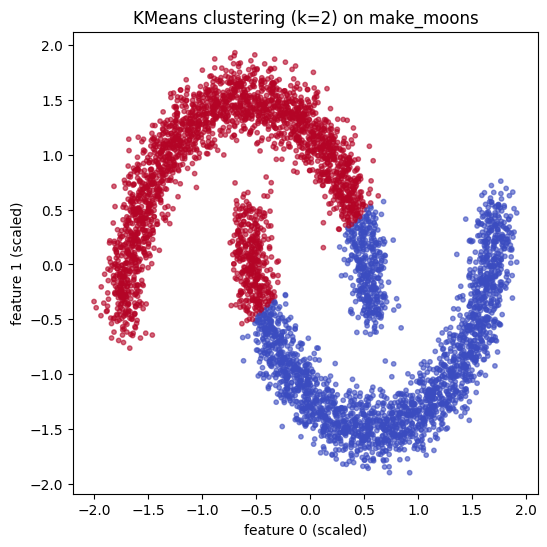

'\ns=10\nControls marker size (the size of each dot in the scatter plot).\nDefault is s=20.\nSmaller value → tinier points, larger value → bigger bubbles.\n\nalpha=0.6\nControls transparency (opacity) of points.\nRange: 0.0 (completely invisible) → 1.0 (fully solid).\nHere 0.6 means 60% opaque → you can still see overlapping points better.\n'

In [86]:
# KMeans with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

# Plot points colored by cluster assignment
plt.figure(figsize=(6,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=kmeans.labels_, cmap="coolwarm", s=10, alpha=0.6)
plt.title("KMeans clustering (k=2) on make_moons")
plt.xlabel("feature 0 (scaled)")
plt.ylabel("feature 1 (scaled)")
plt.show()

"""
s=10
Controls marker size (the size of each dot in the scatter plot).
Default is s=20.
Smaller value → tinier points, larger value → bigger bubbles.

alpha=0.6
Controls transparency (opacity) of points.
Range: 0.0 (completely invisible) → 1.0 (fully solid).
Here 0.6 means 60% opaque → you can still see overlapping points better.
"""

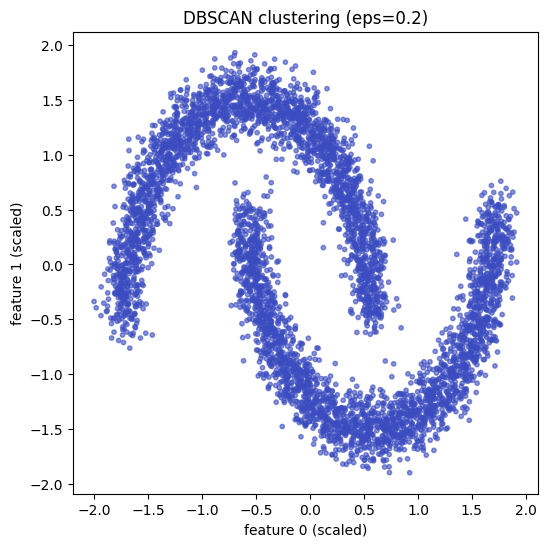

In [97]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Create a DBSCAN object
# ----------------------
# eps = 0.2
#   - This is the "radius" around each point.
#   - DBSCAN looks in this radius to see how many neighbors each point has.
#   - If a point has at least 'min_samples' neighbors inside this radius,
#     it is considered a "core point" (part of a cluster).
#
# Smaller eps → very strict (many points may become noise, more small clusters).
# Larger eps  → very loose (clusters may merge into one big cluster).
#
# min_samples = default=5
#   - Minimum number of neighbors required to form a cluster.
#   - Example: with min_samples=5, a point must have at least 5 neighbors within eps=0.2.
#
dbscan = DBSCAN(eps=0.2)
dbscan.fit(X_scaled)

# After fitting:
# - dbscan.labels_ → cluster assignment for each point.
#   - 0,1,2,... = cluster IDs
#   - -1 = noise (point not assigned to any cluster)
#
plt.figure(figsize=(6,6))
plt.scatter(
    X_scaled[:,0], X_scaled[:,1],
    c=dbscan.labels_,         # color by cluster assignment
    cmap="coolwarm",
    s=10, alpha=0.6           # small points, slight transparency
)
plt.title("DBSCAN clustering (eps=0.2)")
plt.xlabel("feature 0 (scaled)")
plt.ylabel("feature 1 (scaled)")
plt.show()